In [1]:
import pandas as pd
import imp
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cross_validation
from datetime import datetime, timedelta

/home/lalatoofani/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/lalatoofani/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/lalatoofani/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/lalatoofani/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed i

In [2]:
df = pd.read_html('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190203')[0]
df = df[df['Volume']!='-']
df = df.reindex(index=df.index[::-1])
df['Volume'] = df['Volume'].astype(int)
df['Market Cap'] = df['Market Cap'].astype(int)
df = df.reset_index()

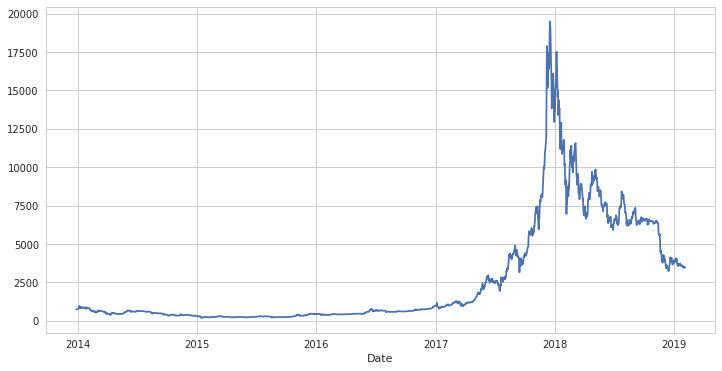

In [3]:
df['Date'] = df['Date'].apply(lambda x:parse(str(x)).date())
df = df.set_index('Date')
df=df.drop('index', axis=1)
sns.set()
sns.set_style('whitegrid')
df['Close**'].plot(figsize=(12,6),label='Close')
plt.show()

In [4]:
df['average'] = (df['Open*']+df['High']+df['Low']+df['Close**'])/4
df['shift'] = df['Close**'].shift(-60)

In [5]:
df.dropna(inplace=True)
X=df.drop('shift',axis=1)
y=df['shift']

In [6]:
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2,random_state=7)

In [7]:
reg=RandomForestRegressor(n_estimators=400,random_state=7)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 92.0349 %


In [8]:
import xgboost as xgb
model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.01, max_depth=40, 
                             min_child_weight=1.7817, n_estimators=400,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.01,
       max_delta_step=0, max_depth=40, min_child_weight=1.7817,
       missing=None, n_estimators=400, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [9]:
accuracy=model.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 91.378 %


In [10]:
X_30=X[-30:]
forecast=model.predict(X_30)

In [11]:
prev_date = df.iloc[-1].name
next_date = prev_date + timedelta(days=1)
date=pd.date_range(next_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df1.index.name='Date'

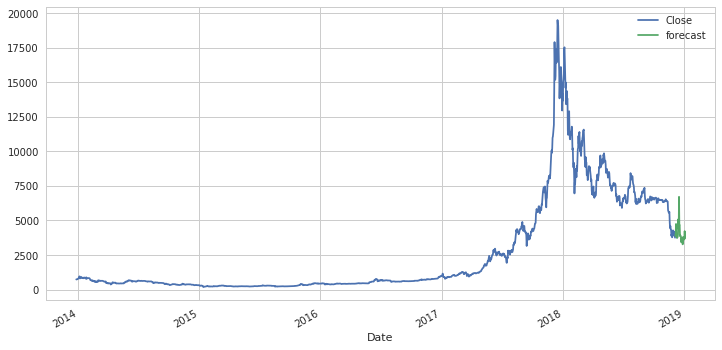

In [12]:
df['Close**'].plot(figsize=(12,6),label='Close')
df1['Forecast'].plot(label='forecast')
plt.legend()

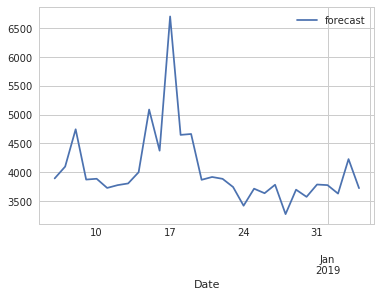

In [13]:
df1['Forecast'].plot(label='forecast')
plt.legend()